In this notebook, an evaluation of climate data will be carried out from the database of the Spanish Meteorological Agency, [AEMET](https://www.aemet.es/es/datos_abiertos), specifically a time series of precipitation and temperature provided by this entity and coming from any of the active meteorological stations closest to a certain point or point of interest. 

This information provided by AEMET for users is done through an API for public use and accessible through API-KEY, so to reproduce this code it will be necessary to register [here](https://opendata.aemet.es/centrodedescargas/altaUsuario).

**Objective**

Present a collection of functions and processes representing a very common workflow of a data science project, from extraction, to data transformation, figures generation and some preliminar statistic analysis, within the context of climate change and geographical data. 

**Methodology**

1. Import libraries.

2. Defining access variables.

3. Point of interest selection (PI) and closest stations (CS) calculations and geographic representation with folium. 

4. Requests of climate data through API interaction.

5. Data processing and application of the necessary transformations. 

6. Figure generation to graphically describe the evolution of temperature and rainfall variables within a previously selected time frame.

7. Automation of the comparative analysis to assess whether there have been significant changes in rainfall between the different years of dataset coverage.

8. Conclusions 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Acces-variables" data-toc-modified-id="Acces-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acces variables</a></span></li><li><span><a href="#Point-of-interest-selection-(PI)-and-closest-stations-(CS)-calculations-and-geographic-representation-with-folium." data-toc-modified-id="Point-of-interest-selection-(PI)-and-closest-stations-(CS)-calculations-and-geographic-representation-with-folium.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Point of interest selection (PI) and closest stations (CS) calculations and geographic representation with folium.</a></span><ul class="toc-item"><li><span><a href="#Point-of-interest-selection,-PI" data-toc-modified-id="Point-of-interest-selection,-PI-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Point of interest selection, PI</a></span></li><li><span><a href="#Closest-Station-Calculation,-CL" data-toc-modified-id="Closest-Station-Calculation,-CL-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Closest Station Calculation, CL</a></span><ul class="toc-item"><li><span><a href="#Retrieve-information-of-each-station" data-toc-modified-id="Retrieve-information-of-each-station-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Retrieve information of each station</a></span></li><li><span><a href="#Data-processing-of-all-active-stations" data-toc-modified-id="Data-processing-of-all-active-stations-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Data processing of all active stations</a></span></li><li><span><a href="#Final-calculation,-minimum-distance-between-point-of-interest-and-closest-station" data-toc-modified-id="Final-calculation,-minimum-distance-between-point-of-interest-and-closest-station-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Final calculation, minimum distance between point of interest and closest station</a></span></li></ul></li><li><span><a href="#Graphic-representation-of-the-result-obtained,-stations,-point-of-interest-and-nearest-station" data-toc-modified-id="Graphic-representation-of-the-result-obtained,-stations,-point-of-interest-and-nearest-station-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Graphic representation of the result obtained, stations, point of interest and nearest station</a></span></li></ul></li><li><span><a href="#Requests-of-climate-data." data-toc-modified-id="Requests-of-climate-data.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Requests of climate data.</a></span></li><li><span><a href="#Data-processing-and-application-of-the-necessary-transformations." data-toc-modified-id="Data-processing-and-application-of-the-necessary-transformations.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data processing and application of the necessary transformations.</a></span><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Rainfall" data-toc-modified-id="Rainfall-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Rainfall</a></span></li><li><span><a href="#Selecting-the-appropriate-number-of-observations-per-month" data-toc-modified-id="Selecting-the-appropriate-number-of-observations-per-month-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Selecting the appropriate number of observations per month</a></span></li><li><span><a href="#Sorting-data-by-date" data-toc-modified-id="Sorting-data-by-date-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Sorting data by date</a></span></li><li><span><a href="#Changing-datatypes,-from-str-to-numeric-values" data-toc-modified-id="Changing-datatypes,-from-str-to-numeric-values-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Changing datatypes, from str to numeric values</a></span></li><li><span><a href="#Missing-data-imputation" data-toc-modified-id="Missing-data-imputation-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Missing data imputation</a></span></li></ul></li></ul></li><li><span><a href="#Figures" data-toc-modified-id="Figures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figures</a></span><ul class="toc-item"><li><span><a href="#Temperatures,-historical-series-of-minimum,-maximum-and-average-temperatures" data-toc-modified-id="Temperatures,-historical-series-of-minimum,-maximum-and-average-temperatures-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Temperatures, historical series of minimum, maximum and average temperatures</a></span></li><li><span><a href="#Monthly-evolution-of-the-average-minimum-and-maximum-temperature-throughout-the-entire-historical-series" data-toc-modified-id="Monthly-evolution-of-the-average-minimum-and-maximum-temperature-throughout-the-entire-historical-series-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Monthly evolution of the average minimum and maximum temperature throughout the entire historical series</a></span></li><li><span><a href="#Precipitation-description:-monthly-accumulated-values" data-toc-modified-id="Precipitation-description:-monthly-accumulated-values-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Precipitation description: monthly accumulated values</a></span></li><li><span><a href="#Climograph" data-toc-modified-id="Climograph-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Climograph</a></span></li></ul></li><li><span><a href="#Statistics:-searching-for-significant-differences-for-annual-precipitations" data-toc-modified-id="Statistics:-searching-for-significant-differences-for-annual-precipitations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Statistics: searching for significant differences for annual precipitations</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Import libraries

In [1]:
import os
import json

import requests

import numpy as np
import pandas as pd
import geopandas as gpd

import scipy.stats as stats
from scipy.spatial import cKDTree
from shapely.geometry import Point

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec 
import seaborn as sns

import datetime, calendar, time

import folium

# Acces variables

As mentioned before, the access to the climatic data stored in the AEMET database must be done through an API requests, either configuration of the different access parameters and the construction of the different endpoints necessary for such interaction are shown below. **For privacy reasons the api key will be called from an external file (my_api_key.json)**

In [2]:
with open('my_api_key.json') as key:
    API_KEY = json.load(key)
API_KEY = API_KEY['API_KEY']

access_vars = {"base_url": "https://opendata.aemet.es/opendata",
               "active_stations_end_point":"/api/valores/climatologicos/inventarioestaciones/todasestaciones",
               "end_daily_ponit": "f'/api/valores/climatologicos/diarios/datos/fechaini/{fechaIniStr}/fechafin/{fechaFinStr}/estacion/{idema}'",
               "meteo_vars_of_interest":{"fecha":"AAAA-MM-DD",#date
                                         "tmed": "celsius",
                                         "tmax": "celsius",
                                         "tmin": "celsius",
                                         "prec": "mm"}}

* **API_KEY**: necessary to guarantee access to AEMET information
* **base_url**: root url, needed for each call
* **active_stations_end_point**: end point to obtain the active stations, this data contains a general description of the active stations, such as their location (lat and lng coordinates) and their ID
* **end_daily_ponit**: endpoiwith the daily data of a specific station within an specific time frame (from date *fechaIniStr* to date *fechaFinStr*).
* **meteo_vars_of_interest**: climate variables that we want to explore.

#  Point of interest selection (PI) and closest stations (CS) calculations and geographic representation with folium.

## Point of interest selection, PI

Any location of interest in the following interactive *Folium* map within national territory (Iberian Peninsula, Balearic Islands, Canary Islands and North Africa territories) could be used for the analysis. These coordinates will be used to calculate the closest meteo station (in this particular case: Latitude:42.0641, Longitude:-0.7863).

In [48]:
my_map = folium.Map(location=[39.8, -3.77], zoom_start=6)
html = '''Latitude:42.0641<br>
Longitude:-0.7863<br>'''
iframe = folium.IFrame(html, width=150, height=60)
popup = folium.Popup(iframe, max_width=150)
mrk = folium.Marker(location=[42.0641, -0.7863],  popup = popup, icon = folium.Icon(icon = 'info-sign', color = 'green')).add_to(my_map)
my_map

In [50]:
lat = 42.0641
lon = -0.7863
print(f'Point of interest: {lat, lon}')

Point of interest: (42.0641, -0.7863)


## Closest Station Calculation, CL

### Retrieve information of each station

This process involves a request to the API to obtain the geographic data of the active stations at the time of the call (there are some stations that are not always available for consultation using this procedure). A small calculation will also be applied to help us identify which station is closest to the point of interest.

In [51]:
headers = {'content-type' : 'application/json', 'cache-control': "no-cache"}             #specify output format of the requests
querystring = {"api_key": API_KEY}                                                       #our api key 


end_point_call = access_vars['base_url'] + access_vars['active_stations_end_point']      #endpoint configuration

response = requests.get(end_point_call, headers = headers, params = querystring).json()
if response['estado'] == 200:
    data = requests.get(response['datos']).json()

In [52]:
data

[{'latitud': '413515N',
  'provincia': 'BARCELONA',
  'altitud': '74',
  'indicativo': '0252D',
  'nombre': 'ARENYS DE MAR',
  'indsinop': '08186',
  'longitud': '023224E'},
 {'latitud': '411734N',
  'provincia': 'BARCELONA',
  'altitud': '4',
  'indicativo': '0076',
  'nombre': 'BARCELONA AEROPUERTO',
  'indsinop': '08181',
  'longitud': '020412E'},
 {'latitud': '412506N',
  'provincia': 'BARCELONA',
  'altitud': '408',
  'indicativo': '0200E',
  'nombre': 'BARCELONA, FABRA',
  'indsinop': '',
  'longitud': '020727E'},
 {'latitud': '412326N',
  'provincia': 'BARCELONA',
  'altitud': '6',
  'indicativo': '0201D',
  'nombre': 'BARCELONA',
  'indsinop': '08180',
  'longitud': '021200E'},
 {'latitud': '414312N',
  'provincia': 'BARCELONA',
  'altitud': '291',
  'indicativo': '0149X',
  'nombre': 'MANRESA',
  'indsinop': '08174',
  'longitud': '015025E'},
 {'latitud': '413125N',
  'provincia': 'BARCELONA',
  'altitud': '146',
  'indicativo': '0229I',
  'nombre': 'SABADELL AEROPUERTO',
  'i

Output description



| Key   | values |
| :---:        |    :----   |
| **latitud**      | Latitude in DMS type alphanumeric format     |
| **provincia**   | Province to which the station belongs       |
| **altitud**       | Altitude at which the station is located       |
| **indicativo**   | ID or reference of the station (with this specific ID we will execute our requests)       |
| **nombre**     | Station municipality       |
| **indsinop**     | Synoptic ID      |
| **longitud**     | Longitude and latitude in DMS type alphanumeric format       |

### Data processing of all active stations

In order to locate the closest station to the point of interest, it is necessary to work under the same format or reference system, requiring the application of some transformation of the data returned by the AEMET API of its stations. This transformation is necessary in order to obtain a numerical equivalent that allows us to perform the proximity calculation without errors.

Due to the above, it will be necessary to design a processing strategy that helps us to homogenize the geographic data under the same coordinate system. The data that the AEMET returns from its stations, regarding their location, are given in the DMS system, specifically in alphanumeric format, representing degrees, minutes and seconds. The intention of the following code cells is to generate a function whose application on the location of the stations facilitates the transformation of the data to the decimal system of latitude and longitude (as the point of interest is represented in the folium map).

In [53]:
def GGMMSS_to_dec (value):
        '''Adjust the coordinates to a decimal system with which to be able to compute distances later'''
        transf_const = 1
        if value.endswith('W') or value.endswith('S'):
            transf_const = -1                                        #for coordinates to the left of the greenwich meridian
        return float(value[0:2]+'.'+value[2:-1])*transf_const

#Application of the GGMMSS_to_dec function to each pair of points (lat and lon) of each station with its 
#transformation to a geometric format through the application of the Point function from the shapely library
geometry = [Point(GGMMSS_to_dec(station['longitud']), GGMMSS_to_dec(station['latitud'])) for station in data]

#Retrive some  data for each station such as ID, province and name of the municipality
stations = [station['indicativo'] for station in data]
provincia = [station['provincia'] for station in data]
localidad = [station['nombre'] for station in data]

#Generate a dataframe
stations_info = {
                'ID': stations, 
                'geometry': geometry,
                'latitude': [my_point.y for my_point in geometry],
                'longitude': [my_point.x for my_point in geometry],
                'province': provincia,
                'municipality': localidad 
                       }

stations_info_df = gpd.GeoDataFrame(stations_info, crs = 4326)

In [54]:
display(stations_info_df.head())

,ID,geometry,latitude,longitude,province,municipality
0,0252D,POINT (2.32240 41.35150),41.3515,2.3224,BARCELONA,ARENYS DE MAR
1,0076,POINT (2.04120 41.17340),41.1734,2.0412,BARCELONA,BARCELONA AEROPUERTO
2,0200E,POINT (2.07270 41.25060),41.2506,2.0727,BARCELONA,"BARCELONA, FABRA"
3,0201D,POINT (2.12000 41.23260),41.2326,2.1200,BARCELONA,BARCELONA
4,0149X,POINT (1.50250 41.43120),41.4312,1.5025,BARCELONA,MANRESA


### Final calculation, minimum distance between point of interest and closest station

Una vez tenemos los datos bajo un sistema de coordenadas unificado podemos calcular cuál de todas las estaciones activas de AEMET es la más cercana y una vez obtenida su ID pasar a la extracción de los datos de la serie temporal.

To optimize the calculation of the nearest station, KD-tree will be used, a very efficient structure for the search of nearest neighbors, specifically the function **cKDTree()** from the **scipy** library.

In [55]:
def closest_stations (stations, your_lat, your_lon, n = 1): 
    decomposition_func = lambda x: (x.x, x.y)
    pnts = np.array([decomposition_func(point) for point in stations['geometry']])
    btree = cKDTree(pnts)
    distance, ix = btree.query(decomposition_func(Point(your_lon, your_lat)), k = n)
    my_station = {
                  'Station': stations.iloc[ix]['ID'], 
                  'geometry_point_of_interest': [your_lat, your_lon],
                  'geometry_station': [stations.iloc[ix]['latitude'], stations.iloc[ix]['longitude']],
                  'province': stations.iloc[ix]['province'],
                  'municipality': stations.iloc[ix]['municipality']
                 }
    return my_station

In [56]:
my_station = closest_stations (stations_info_df, lat, lon)
my_station

{'Station': '9244X',
 'geometry_point_of_interest': [42.0641, -0.7863],
 'geometry_station': [42.2927, -1.1249],
 'province': 'ZARAGOZA',
 'municipality': 'SOS DEL REY CATÓLICO'}

In [57]:
print(f"Closest station ID: {my_station['Station']}, coordinates: {my_station['geometry_station']}")

Closest station ID: 9244X, coordinates: [42.2927, -1.1249]


**Note:**
*It is important to note that the ideal situation for computing the minimum distance would involve the use of z-distance or altitude, but to keep things simple and avoid loading a raster that requires considerable space, we will limit the calculations to two-dimensional space using latitude and longitude.*

## Graphic representation of the result obtained, stations, point of interest and nearest station

In [58]:
new_decomposition_func = lambda point: [point.y, point.x]
all_stations_but_mine = stations_info_df[stations_info_df['ID'] != my_station['Station']]
my_final_map = folium.Map(location=[39.8, -3.77], zoom_start=6)
decomposition_func = lambda point: [point.y, point.x]

#markers for every active station
for i in range(0, all_stations_but_mine.shape[0]):
    folium.Marker(location = new_decomposition_func(all_stations_but_mine.iloc[i]['geometry']), 
                  popup = all_stations_but_mine.iloc[i]['ID']).add_to(my_final_map)
    
#marker for closest station   
folium.Marker(location = my_station['geometry_station'], 
              popup = f"ID: {my_station['Station']}\nProvince:{my_station['province']}\nmunicipality:{my_station['municipality']}",
              icon = folium.Icon(icon = 'cloud' ,color = 'red')).add_to(my_final_map)

#marker for point of interest  
folium.Marker(location = (lat, lon), popup = 'Point of interest',
              icon = folium.Icon(icon = 'info-sign', color = 'green')).add_to(my_final_map)
display(my_final_map)

**Note:**
Although most of the AEMET weather stations are located on land, there are also stations in maritime locations. These sea stations are especially relevant for meteorological and oceanographic monitoring, as they provide information on climate and ocean conditions in the marine environment. AEMET operates weather stations on different types of maritime platforms, such as buoys or lighthouses, located in coastal areas and offshore. These maritime stations collect valuable data for the study of climate and weather conditions in the marine environment.

This is the reason why stations appear outside the area delimited by the Iberian Peninsula, the Balearic Islands or other territories in North Africa.

# Requests of climate data.

As previously mentioned, we are going to use the most up-to-date historical series of climatic data offered by the State Meteorological Agency (AEMET) service, for this we will requests all the daily data available of **Temperature** and **Precipitation** that the closest station may have from within a certain time frame.

According to the API documentation, not all stations will have the same number of records, that is, not all stations will have data covering the selected time frame nor all the variables of interest, another possible inconvinient that we may face is that, despite being included or considered as *"active station"* our petition may return as unauthorised or not found, so it will be necessary to design a strategy that considers these potential drawbacks.

In [59]:
id_s = stations_info_df['ID'].tolist()

In [60]:
def meteo_temporal_daily_series (my_station_data,
                                 all_stations,
                                 range_years = 8,               
                                 warnings = True,               
                                 minimum_range_years = 3,       
                                 metadata = True):      
    
    """
    Retrieve information from the closest station with data available depending on search criteria to point of interest
    
    my_station_data: dict, complete info of our closest station (dictionary created with closest_stations function)
    all_stations: Geopandas_df, data from stations available
    range_years: int, initial time frame of information to collect from station
    warnings: bool, print warnings to detailed all possbile exceptions during request (optional)
    minimum_range_years: int, threshold (minimum years) from which a new station has to be considered
    metadata: bool, retrieve metadata (optional)
    
    """

    
    def try_next(new_stations):
        my_lat, my_lng = my_station_data['geometry_point_of_interest']
        new_closest_station = closest_stations (new_stations, my_lat, my_lng, n = 1)
        if warnings:
            print(f"Evaluating station {new_closest_station['Station']}")
        return meteo_temporal_daily_series (new_closest_station, all_stations = new_stations)
    
    #configuration time frame and ID station_S
    base = datetime.datetime.today()
    date_list = [(base - datetime.timedelta(days=x)).strftime("%Y-%m-%d") for x in range(365*range_years)][::-1]
    new_date_list = [date_list[0], date_list[-1]]
    fechaIniStr, fechaFinStr  = f'{date_list[0]}T00:00:00UTC', f'{date_list[-1]}T23:59:59UTC'
    idema = my_station_data['Station']
    
    
    #customizing requests
    end_point_call = access_vars['base_url'] + eval(access_vars['end_daily_ponit'])
    headers = {'content-type' : 'application/json', 'cache-control': "no-cache"}
    querystring = {"api_key": API_KEY} 
    response = requests.get(end_point_call, headers = headers, params=querystring).json()
    
    #processing request
    new_range_years = range_years
    #if theres no data
    while response['estado'] != 200:  
        
        #if data not found for the time frame we wanted to explore reevaluate with one year less than the original range
        if response['estado'] == 404:
            new_range_years -= 1
            #Evaluate this until the time frame is equal to a threshold == minimum_range_years
            if minimum_range_years <= new_range_years:
                if warnings:
                    print(f'Theres no data for {new_range_years+1} years, trying {new_range_years} years instead')
                return meteo_temporal_daily_series (my_station_data, all_stations, new_range_years)
            #If the above doesnt work try next closest station
            else:
                if warnings:
                    print(f'Theres no data in station {idema}, trying the next closest stations to point of interest')
                    print(idema)
                all_stations = all_stations.loc[all_stations['ID'] != idema]
                return try_next(all_stations)
        #If Unauthorized try next closest station
        elif response['estado'] == 401:
            if warnings:
                print(f'Unauthorized petition for station {idema}, trying the next closest station to point of interest')
            all_stations = all_stations.loc[all_stations['ID'] != idema]
            return try_next(all_stations)
    #if response == 200 give me data & metadata (optional)
    else:
        data =  requests.get(response['datos']).json()
        if metadata:
            meta_data = requests.get(response['metadatos']).json()
        variables = access_vars['meteo_vars_of_interest'].keys()
        final_data = [{variable: day[variable] for variable in variables if variable in day.keys()} for day in data]
        
        parameters = set([variable for date in final_data for variable in date if variable != 'fecha'])
        if parameters != set(['prec', 'tmax', 'tmed', 'tmin']):
            if warnings:
                print('The variables of interest are not included in your set, trying next closest station')
                print(idema)
            all_stations = all_stations.loc[all_stations['ID'] != idema]
            return try_next(all_stations)
        
        return final_data, parameters, meta_data if metadata else final_data, parameters


In [61]:
#Retrieving data from API requests
daily_data = meteo_temporal_daily_series(my_station, stations_info_df.copy())

Theres no data for 8 years, trying 7 years instead
Theres no data for 7 years, trying 6 years instead
Theres no data for 6 years, trying 5 years instead


In [62]:
#actual data
daily_data[0]

[{'fecha': '2018-08-20',
  'tmed': '22,4',
  'tmax': '30,3',
  'tmin': '14,6',
  'prec': '0,0'},
 {'fecha': '2018-08-21',
  'tmed': '22,6',
  'tmax': '31,4',
  'tmin': '13,9',
  'prec': '0,0'},
 {'fecha': '2018-08-22',
  'tmed': '23,8',
  'tmax': '32,3',
  'tmin': '15,4',
  'prec': '0,4'},
 {'fecha': '2018-08-23',
  'tmed': '22,0',
  'tmax': '28,8',
  'tmin': '15,3',
  'prec': '0,0'},
 {'fecha': '2018-08-24',
  'tmed': '19,6',
  'tmax': '24,2',
  'tmin': '14,9',
  'prec': '0,0'},
 {'fecha': '2018-08-25',
  'tmed': '17,6',
  'tmax': '21,6',
  'tmin': '13,7',
  'prec': '0,0'},
 {'fecha': '2018-08-26',
  'tmed': '19,3',
  'tmax': '27,6',
  'tmin': '11,0',
  'prec': '0,0'},
 {'fecha': '2018-08-27',
  'tmed': '22,2',
  'tmax': '31,6',
  'tmin': '12,9',
  'prec': '0,0'},
 {'fecha': '2018-08-28',
  'tmed': '24,4',
  'tmax': '31,1',
  'tmin': '17,8',
  'prec': '0,0'},
 {'fecha': '2018-08-29',
  'tmed': '21,5',
  'tmax': '27,5',
  'tmin': '15,5',
  'prec': '0,0'},
 {'fecha': '2018-08-30',
  'tm

In [63]:
#variables
daily_data[1]

{'prec', 'tmax', 'tmed', 'tmin'}

In [64]:
#METADATA:
daily_data[2]

{'unidad_generadora': 'Servicio del Banco Nacional de Datos Climatológicos',
 'periodicidad': '1 vez al día, con un retardo de 4 días',
 'descripcion': 'Climatologías diarias',
 'formato': 'application/json',
 'copyright': '© AEMET. Autorizado el uso de la información y su reproducción citando a AEMET como autora de la misma.',
 'notaLegal': 'https://www.aemet.es/es/nota_legal',
 'campos': [{'id': 'fecha',
   'descripcion': 'fecha del dia (AAAA-MM-DD)',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'indicativo',
   'descripcion': 'indicativo climatológico',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'nombre',
   'descripcion': 'nombre (ubicación) de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'provincia',
   'descripcion': 'provincia de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'altitud',
   'descripcion': 'altitud de la estación en m sobre el nivel del mar',
   'tipo_datos': 'float',
   'unidad': 

# Data processing and application of the necessary transformations. 

In [79]:
df = pd.DataFrame.from_dict(daily_data[0])

In [80]:
#Date column translated to english
df.rename(columns = {'fecha':'date'}, inplace = True)

In [81]:
display(df.head())

,date,tmed,tmax,tmin,prec
0,2018-08-20,"22,4","30,3","14,6","0,0"
1,2018-08-21,"22,6","31,4","13,9","0,0"
2,2018-08-22,"23,8","32,3","15,4","0,4"
3,2018-08-23,"22,0","28,8","15,3","0,0"
4,2018-08-24,"19,6","24,2","14,9","0,0"


In [82]:
df.info(memory_usage = 'deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1804 non-null   object
 1   tmed    1764 non-null   object
 2   tmax    1764 non-null   object
 3   tmin    1764 non-null   object
 4   prec    1800 non-null   object
dtypes: object(5)
memory usage: 541.1 KB


## Data preprocessing

### Date

In [83]:
#Change date format to datetype
df['date'] = pd.to_datetime(df['date'])

#Adding columns for multiple date references: month and year
df['year'] = df['date'].apply(lambda date: int(date.strftime('%Y')))
df['month'] = df['date'].apply(lambda date: date.strftime('%b'))

### Rainfall

**Note:** 
*If the value measured for rainfall or precipitation is less than 0.1 mm, the value for that observation is 'Ip' (meaning Inferior to 0.1mm), therefore, in this case we will considering those rainfall observations as 0*

In [84]:
df['prec'] = df['prec'].apply(lambda x: '0' if x == 'Ip' else x)

### Selecting the appropriate number of observations per month

**Note:**
*For some of the figures that we will generate (such as the accumulated value of rainfall per month or average monthly or annual values), it will be necessary to establish a minimum number of observations per month that guarantees the coherence of the graphic representations that we will develop later, in this case 15 will be the number of observations per month minum to consider.*

In [85]:
minum_observations_per_month = 15
f = {i: dfg for i, dfg in enumerate(df.groupby(['year', 'month'])) if dfg[1].shape[0] >= minum_observations_per_month}

valids_df_s = []
for i in range(len(list(f.keys()))):
    try:
        valids_df_s.append(f[i][1])
    except KeyError as err:
        continue
        
new_df = pd.concat(valids_df_s, ignore_index = True)

In [86]:
new_df.info(memory_usage = 'deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1761 non-null   datetime64[ns]
 1   tmed    1721 non-null   object        
 2   tmax    1721 non-null   object        
 3   tmin    1721 non-null   object        
 4   prec    1757 non-null   object        
 5   year    1761 non-null   int64         
 6   month   1761 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 543.6 KB


### Sorting data by date

In [87]:
new_df.sort_values(by='date', inplace = True)
new_df.set_index('date', drop = True, inplace = True)

In [88]:
display(new_df.head())

,tmed,tmax,tmin,prec,year,month
date,,,,,,
2018-09-01,"21,0","28,7","13,2","0,0",2018,Sep
2018-09-02,"20,5","29,6","11,4","0,0",2018,Sep
2018-09-03,"20,3","28,0","12,6","0,0",2018,Sep
2018-09-04,"21,8","29,3","14,2","5,8",2018,Sep
2018-09-07,"19,4","25,5","13,4","0,0",2018,Sep


### Changing datatypes, from str to numeric values

In [89]:
def isfloat(value):
    try:
        return float(value)
    except ValueError:
            return np.nan
        
for i in new_df.columns:
    if i in list(access_vars['meteo_vars_of_interest'].keys())[1:]:
        new_df[i] = new_df[i].apply(lambda x: x.replace(',', '.') if type(x) == str else x)
        new_df[i] = new_df[i].apply(isfloat)

In [90]:
new_df.info(memory_usage = 'deep', verbose = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2018-09-01 to 2023-08-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmed    1721 non-null   float64
 1   tmax    1721 non-null   float64
 2   tmin    1721 non-null   float64
 3   prec    1757 non-null   float64
 4   year    1761 non-null   int64  
 5   month   1761 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 185.7 KB


### Missing data imputation

In case of having any missing data for temperatures or rainfall, the following imputation strategy will be carried out: 

 **Temperature:** temperatures tend to follow a very differential progressive increase or decrease, being very similar to the records between days, that is, for the same location there is usually not much difference between the temperature of one day with the day before or with the day after, so the imputation strategy, in case of missing data, will be to interpolate between days, using the *interpolate* function of pandas for pandas series.
 
 **Rainfall:** rainfall, unlike temperatures, is less predictable and considering that it is usually given in terms of mm accumulated per month, possible missing values will be replaced by the average of the month to which they belong (within their respective year), if it were not possible to carry out the imputation in this way (because there are no data for that month), the average for the month of the entire historical series will be substituted.

In [91]:
#Temperatures
temperatures = ['tmed', 'tmax', 'tmin']
for temp in temperatures:
    if new_df[temp].isnull().values.any():
        new_df[temp] = new_df[temp].interpolate(method = 'time')
        
#Rainfall
def impute_precipitation (df, grouped_by = ['year', 'month']):
    if df['prec'].isnull().values.any():
        df['prec'] = df['prec'].fillna(df.groupby(grouped_by)['prec'].transform('mean'))
    if df['prec'].isnull().values.any():
        return impute_precipitation (df, 'month')

impute_precipitation (new_df)

In [92]:
display(new_df.head())

,tmed,tmax,tmin,prec,year,month
date,,,,,,
2018-09-01,21.0,28.7,13.2,0.0,2018,Sep
2018-09-02,20.5,29.6,11.4,0.0,2018,Sep
2018-09-03,20.3,28.0,12.6,0.0,2018,Sep
2018-09-04,21.8,29.3,14.2,5.8,2018,Sep
2018-09-07,19.4,25.5,13.4,0.0,2018,Sep


# Figures

## Temperatures, historical series of minimum, maximum and average temperatures

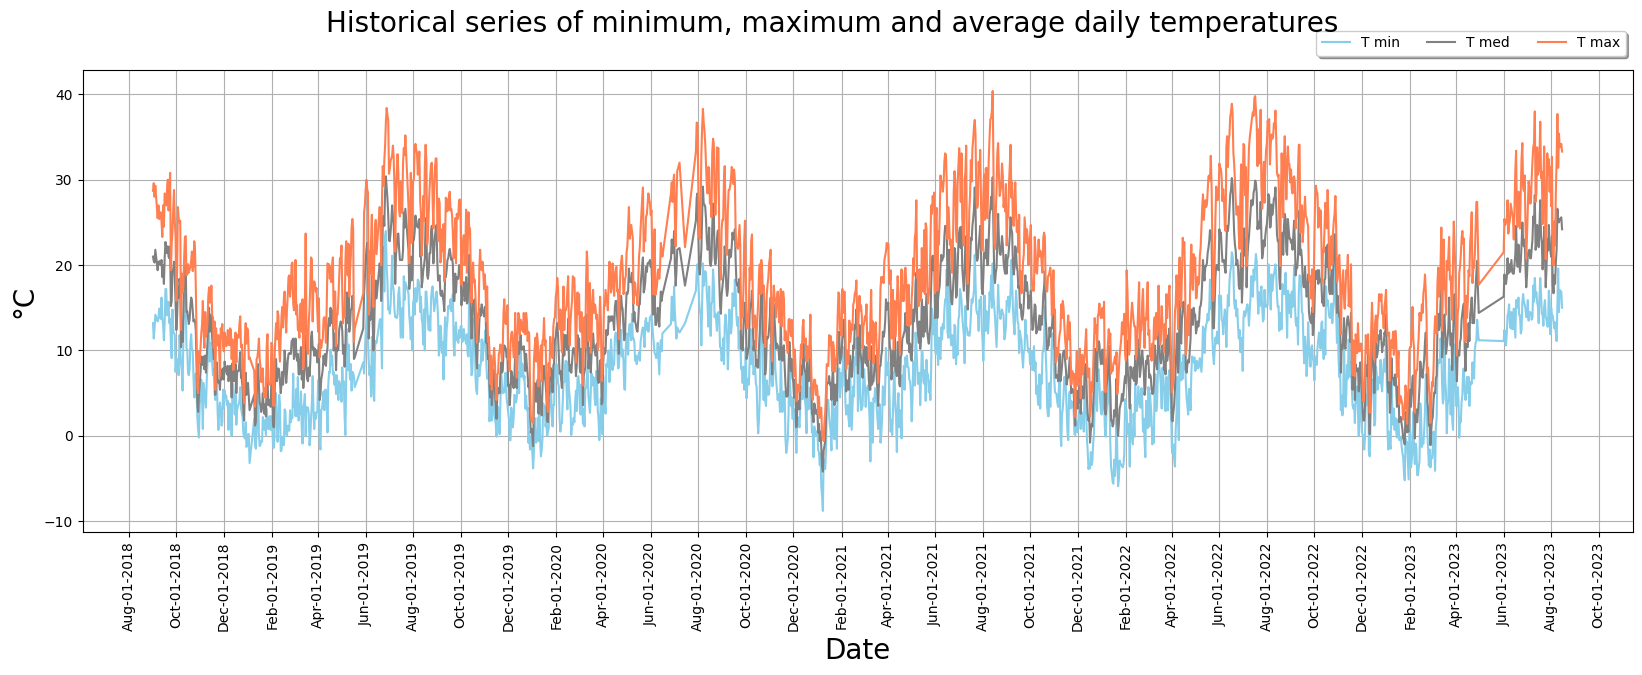

In [93]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(new_df['tmin'], c = 'skyblue', label = 'T min')
ax.plot(new_df['tmed'], c = 'grey', label = 'T med')
ax.plot(new_df['tmax'], c = 'coral', label = 'T max')
ax.set_xlabel('Date', size = 20)
ax.set_ylabel('°C', size = 20)

loc = mdates.MonthLocator(interval = 2)
ax.xaxis.set_major_locator(loc)
fmt = mdates.DateFormatter('%b-%d-%Y')
ax.xaxis.set_major_formatter(fmt)

fig.suptitle('Historical series of minimum, maximum and average daily temperatures', size = 20)
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend(ncol = 3,  loc='upper right', shadow=True, fontsize = 10, bbox_to_anchor=(1, 1.1))
plt.show()

## Monthly evolution of the average minimum and maximum temperature throughout the entire historical series

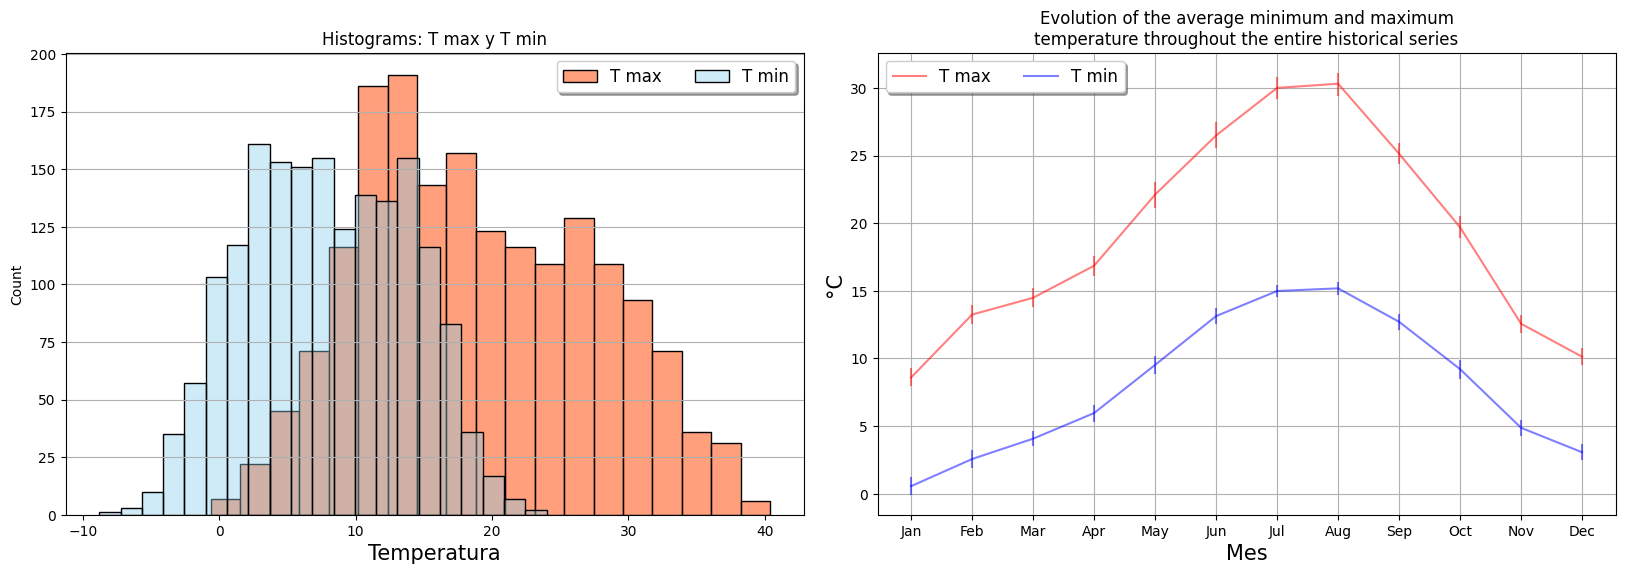

In [94]:
month_s = [calendar.month_abbr[i+1] for i in range(12)]
Dict_groupby_temps = {month: df for month, df in new_df[['tmin', 'tmax', 'tmed', 'month']].groupby('month')}
df_s = [df for df in {month: Dict_groupby_temps[month] for month in month_s}.values()]
df_temperature_ordered = pd.concat(df_s, ignore_index = True)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plt.subplots_adjust(wspace = .1)
#histogram of max and min temperatures
sns.histplot(df_temperature_ordered, x = 'tmax', ax = ax1, color = 'coral', label = 'T max')
sns.histplot(df_temperature_ordered, x = 'tmin', ax = ax1, color = 'skyblue', alpha = .4, label = 'T min')
ax1.set_xlabel('Temperatura', size = 15)
ax1.legend(ncol = 2,  loc='upper right', shadow=True, fontsize = 12, bbox_to_anchor=(1, 1))
ax1.yaxis.grid()
ax1.set_title('Histograms: T max y T min')
#mean values
sns.lineplot(data = df_temperature_ordered, x="month", y="tmax",err_style="bars", color = 'red', alpha = .5, ax =ax2, label = 'T max')
sns.lineplot(data = df_temperature_ordered, x="month", y="tmin",err_style="bars", color = 'blue', alpha = .5, ax =ax2, label = 'T min')
ax2.set_xlabel('Mes', size = 15)
ax2.set_ylabel('°C', size = 15)
ax2.legend(ncol = 2,  loc='upper left', shadow=True, fontsize = 12, bbox_to_anchor=(0, 1))
ax2.set_title('Evolution of the average minimum and maximum\ntemperature throughout the entire historical series')
ax2.grid()
plt.show()

## Precipitation description: monthly accumulated values

In [95]:
#accumulated values from each monthl in the total time series
resume_anual = new_df[['prec','month']].groupby('month').sum().T

display(resume_anual)

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
prec,326.9,37.0,366.7,130.6,304.5,158.98,258.241379,204.2,170.695,462.3,251.6,212.0


In [96]:
# monthly accumulated per year
years = {}
for year, df in new_df[['prec','month', 'year']].groupby('year'):
    monthly_data_per_year = df[['prec','month']].groupby('month').sum().T
    monthly_data_per_year.rename(index={'prec':year},inplace=True)
    years[year] = monthly_data_per_year
resume_monthly = pd.concat(years.values())[month_s]

display(resume_monthly)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.7,76.1,64.3,23.7
2019,71.2,26.3,9.5,74.7,69.615,43.600000,42.00,16.8,46.1,41.3,211.2,81.6
2020,35.7,3.1,127.7,76.6,55.700,55.241379,29.10,8.4,17.8,47.6,40.4,93.8
2021,70.0,75.8,21.8,49.8,30.380,27.000000,1.40,3.6,53.8,38.6,87.4,87.4
2022,33.8,4.4,40.0,94.4,15.000,10.800000,22.00,7.6,40.6,48.0,59.0,80.2
2023,93.8,21.0,5.2,31.4,NaN,121.600000,64.48,0.6,NaN,NaN,NaN,NaN


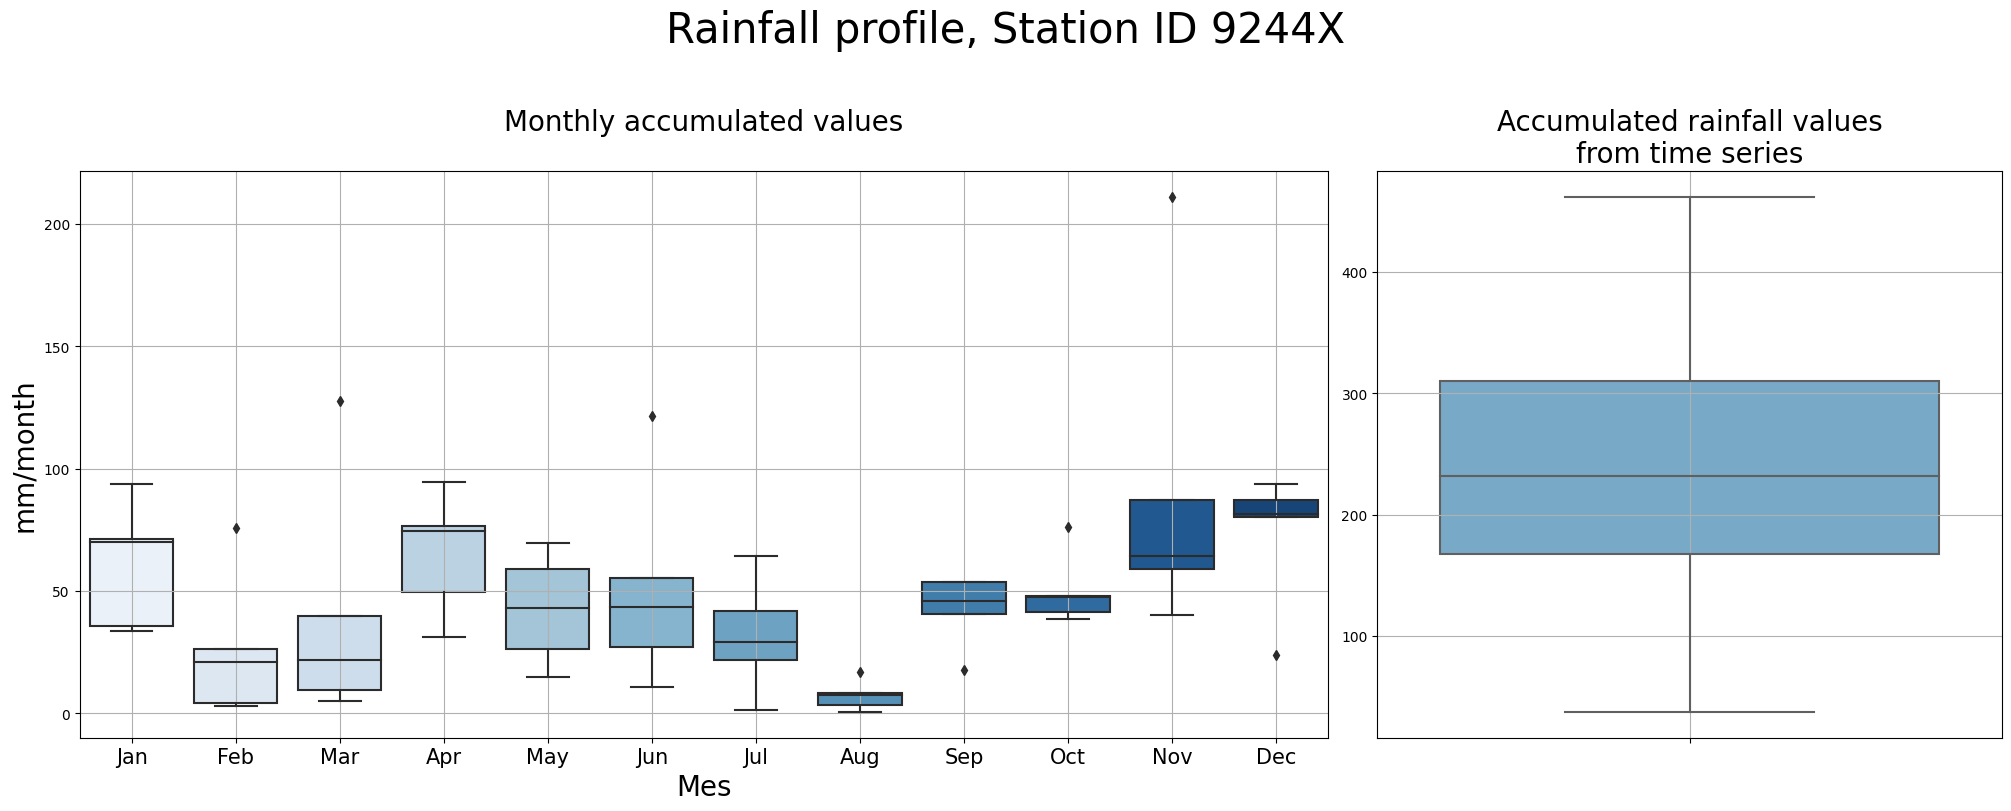

In [97]:
fig = plt.figure(constrained_layout=True, figsize = (20,8))
gs = GridSpec(1,3, figure=fig)

ax1 = fig.add_subplot(gs[0,:-1])
ax2 = fig.add_subplot(gs[0, -1])

sns.boxplot(data = resume_monthly, palette="Blues", order = month_s, ax = ax1)
ax1.set_ylabel('mm/month', fontsize= 20)
ax1.set_xticklabels(month_s, size = 15)
ax1.set_xlabel('Mes', fontsize= 20)
ax1.set_title('Monthly accumulated values\n', fontsize= 20)
ax1.grid(True)

sns.boxplot(y = resume_anual.values, palette="Blues", ax = ax2, showfliers = True)
ax2.set_title('Accumulated rainfall values\nfrom time series', fontsize= 20)
ax2.grid(True)


fig.suptitle(f"Rainfall profile, Station ID {my_station['Station']}\n", size = 30)
plt.show()

## Climograph

A climate graph displays yearly temperature and precipitation statistics for a particular location. Temperature (ºC) is measured using the numbers on the left hand side of the chart. The average temperature for each month is plotted on the graph with a red dot and the dots are then connected in a smooth, red line.

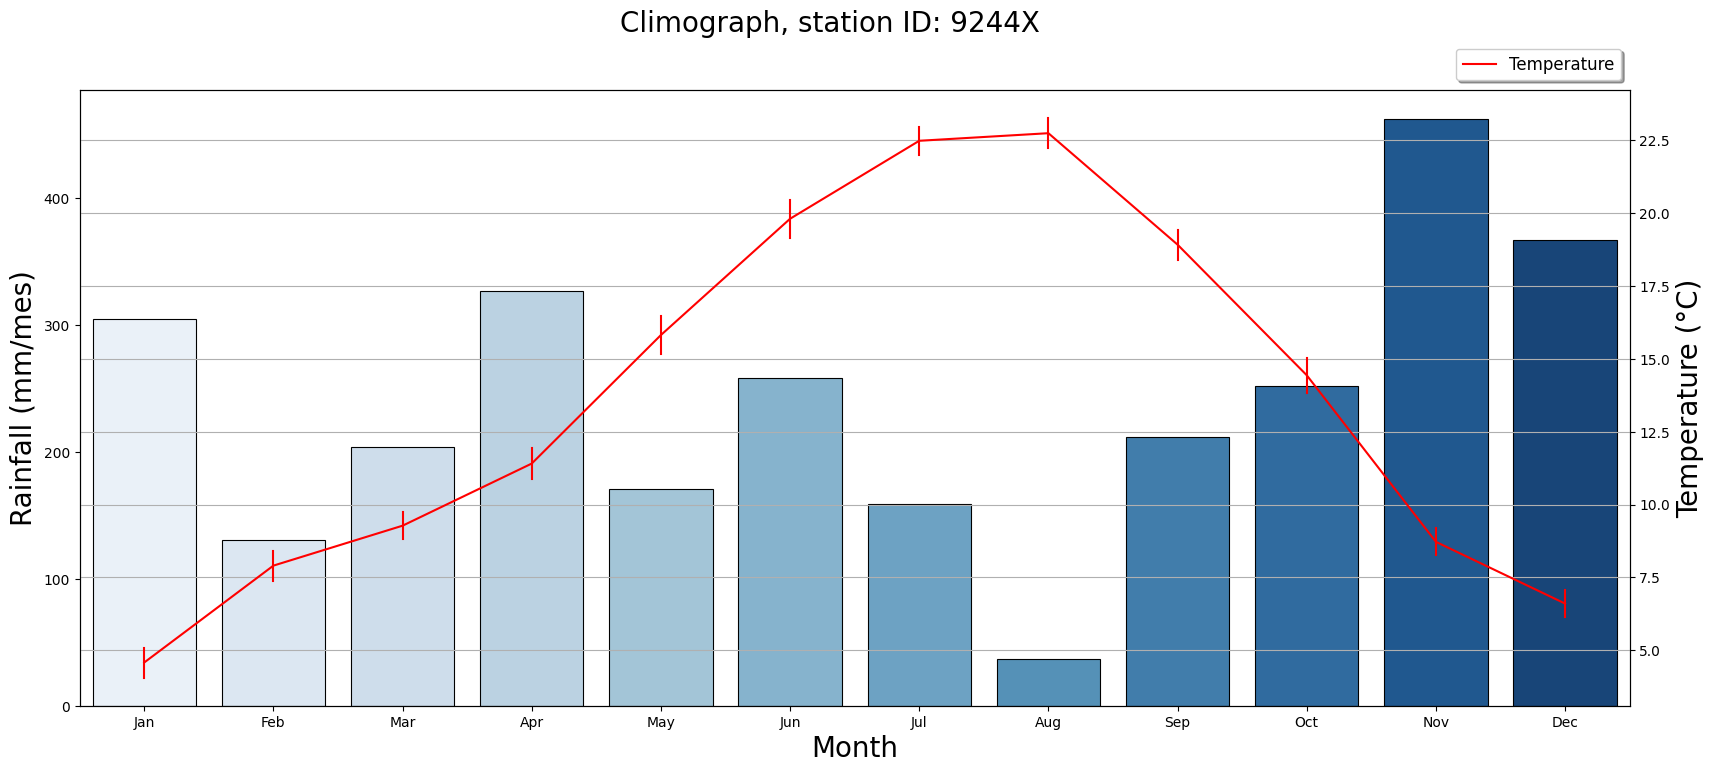

In [98]:
fig, ax = plt.subplots(figsize =(20,8))
ax2 = ax.twinx()
sns.lineplot(data = df_temperature_ordered, x="month", y="tmed", err_style="bars", color = 'red', ax =ax2, 
             label = 'Temperature')
sns.barplot(data = resume_anual.T, x = resume_anual.T.index, y = 'prec', order = month_s,
            ax = ax, 
            palette="Blues", 
            linewidth=0.8, 
            edgecolor="k")

ax.set_ylabel('Rainfall (mm/mes)', size = 20)
ax2.set_ylabel('Temperature (°C)', size = 20)
ax.set_xlabel('Month', size = 20)
fig.suptitle(f"Climograph, station ID: {my_station['Station']}", size = 20)
plt.legend(ncol = 1,  loc='upper right', shadow=True, fontsize = 12, bbox_to_anchor=(1, 1.08))
plt.grid()
plt.show()

# Statistics: searching for significant differences for annual precipitations

In most cases we will find months without information for the first available year of data collection (it will depend on when the station starts the service), so it will not be possible to find data prior to the first month of available data.

On the other hand, no data will be found after the current month of this year (or from the previous month). For the purposes of graphical representation it is not a problem, but it is something that should be considered for statistical analysis.

The data set used was previously calculated (resume_monthly), the comparison will be made between the years with total coverage of accumulated monthly rainfall (measured in mm/month).

In [99]:
# view data
display(resume_monthly)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.7,76.1,64.3,23.7
2019,71.2,26.3,9.5,74.7,69.615,43.600000,42.00,16.8,46.1,41.3,211.2,81.6
2020,35.7,3.1,127.7,76.6,55.700,55.241379,29.10,8.4,17.8,47.6,40.4,93.8
2021,70.0,75.8,21.8,49.8,30.380,27.000000,1.40,3.6,53.8,38.6,87.4,87.4
2022,33.8,4.4,40.0,94.4,15.000,10.800000,22.00,7.6,40.6,48.0,59.0,80.2
2023,93.8,21.0,5.2,31.4,NaN,121.600000,64.48,0.6,NaN,NaN,NaN,NaN


In [100]:
data_to_compare = resume_monthly[~resume_monthly.isnull().any(axis=1)].T
display(data_to_compare)

,2019,2020,2021,2022
month,,,,
Jan,71.200,35.700000,70.00,33.8
Feb,26.300,3.100000,75.80,4.4
Mar,9.500,127.700000,21.80,40.0
Apr,74.700,76.600000,49.80,94.4
May,69.615,55.700000,30.38,15.0
Jun,43.600,55.241379,27.00,10.8
Jul,42.000,29.100000,1.40,22.0
Aug,16.800,8.400000,3.60,7.6
Sep,46.100,17.800000,53.80,40.6


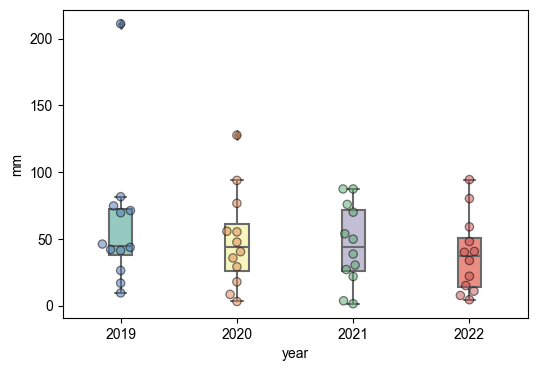

In [101]:
my_data = {year: list(months.values()) for year, months in data_to_compare.to_dict().items()}
points = list(my_data.values())
year = list(my_data.keys())
fig, ax = plt.subplots(figsize = (6, 4))
sns.set(style='whitegrid')
sns.boxplot(data = points, ax = ax, width=.2, palette='Set3')
sns.swarmplot(data = points, size=6, edgecolor="black", linewidth=.9, ax = ax, alpha = .5)
ax.set_ylabel('mm')
ax.set_xlabel('year')
ax.set_xticks([i for i in range(4)], year)
plt.show()

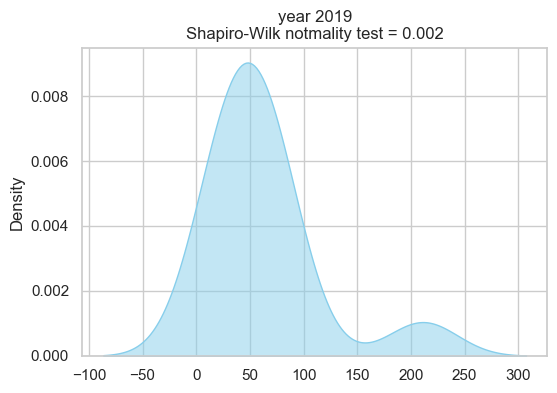

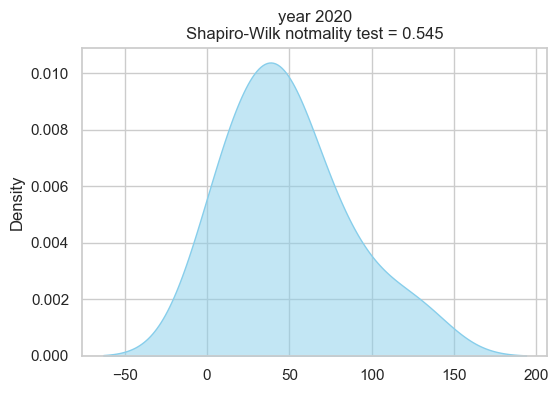

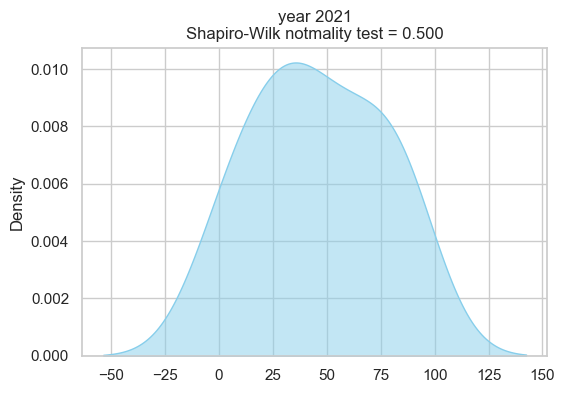

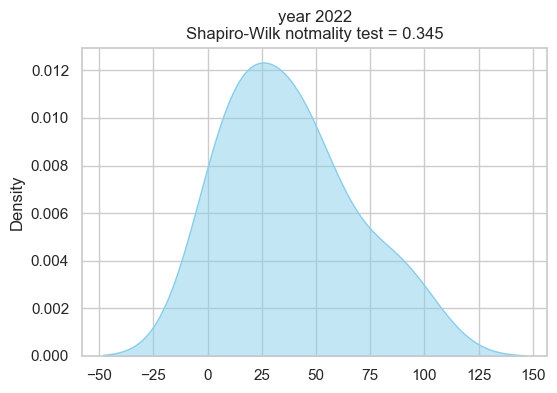

In [102]:
for year in my_data.keys():
    eval_data = my_data[year]
    _, pval = stats.shapiro(eval_data)
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.kdeplot(data = eval_data, fill = True, color = 'skyblue', alpha = .5, ax = ax)
    ax.set_title(f'year {year}\nShapiro-Wilk notmality test = {pval:.3f}')
    plt.show()

In [103]:
def comparing_rainfall_among_years(df, alpha = 0.05):
    
    if df.shape[1] <= 1:
        print('Not enough samples to be compared')
    else:
        years = tuple([df[column] for column in df.columns])
        
        _, levene_pval = stats.levene(*years)                        #levene for homocedasticity
        normality = False
        
        if alpha < levene_pval:                                   
            normality = True                                        
            for year in years:
                _, shapiro_pval = stats.shapiro(year)                  #shapiro for narmality
                if shapiro_pval < alpha:
                    normality = False
                    break
                    
        test = None 
        if df.shape[1] == 2:
            if normality:
                _, pvalue = stats.ttest_ind(a = years[0], b = years[1], equal_var=True)
                test = 'ttest'
            else:
                _, pvalue = stats.mannwhitneyu(years[0], years[1], alternative='two-sided')
                test = 'mannwhitne'
        else:
            if normality:
                _, pvalue = stats.f_oneway(*years)
                test = 'ANOVA'
            else:
                _, pvalue = stats.kruskal(*years)
                test = 'kruskal'

        if alpha < pvalue:
                print(f'There are significant differences between years, {test} test carried out')
        else:
                print(f'There are NOT differences between years, {test} test carried out')

In [104]:
comparing_rainfall_among_years(data_to_compare)

There are significant differences between years, kruskal test carried out


# Conclusions

As mentioned in the objectives, this exercise is oriented to cover, in a very general way, some of the most common aspects of DS projects through a relatively complete example that includes search, extraction, data transformation, exploratory analysis through graphical representation and preliminary analysis. When dealing with climate data, there is an important effect of geography, which has given us the opportunity to play with geographic data through very simple calculations (some of them a bit reductionist) and represent them interactively on a folium map which, by the way, is always fun, for any point of interest (reason why I've tried to automate the process as much as I can, so anybody could try it in a different spot within the spanish territory). Hope you like it!